In [1]:
import matplotlib.pyplot as plt
from numpy import random

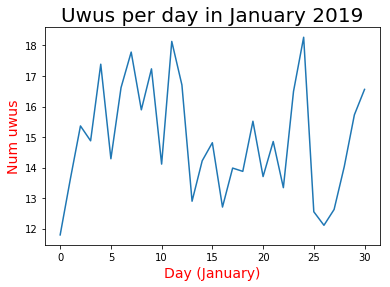

In [2]:
#Setup
z = 15 + 2*random.randn(31) #200 elements, normal dist with mean = 15, sd = 2

plt.title("Uwus per day in January 2019", 
          fontsize = 20)
plt.xlabel("Day (January)", 
           fontsize=14, 
           color='red')
plt.ylabel("Num uwus", 
           fontsize=14, 
           color='red')

plt.plot(z)
# plt.style.use('fivethirtyeight')
plt.show()

In [3]:
import os
import pandas as pd
print(os.listdir("../../pgadmin_tables"))

pgadmin_tables = os.listdir("../../pgadmin_tables") 
data = []

for item in pgadmin_tables:
    if ".csv" in item: data.append(item)

['.DS_Store', 'data-sales.csv', 'data-house.csv']


In [4]:
# set _csv as data-sales and house as data-house-size-price
for item in data:
    if 'sales' in item:
        _csv = pd.read_csv("../../pgadmin_tables/" + item)
    if 'house' in item:
        house = pd.read_csv("../../pgadmin_tables/" + item)

In [5]:
# me being dumb because literally i could have just
# selected the columns i wanted in the query
col = list(_csv.columns)
print(col)

df1 = _csv[[col[0], col[1]]]
print(df1)

# this was the query btw:
# select * from sells
sales = _csv[col[0]].tolist()
sales = [x for x in sales]
agents = _csv[col[1]].tolist()
agents = [x[6:] for x in agents]

['price', 'aname', 'csin', 'laddress']
     price        aname
0   295000  Agent Simon
1  3450000   Agent Josh
2   349000  Agent Katie
3   389000   Agent Dave
4  1150000   Agent Rome
5  1200000   Agent Rome
6  1300000   Agent Rome
7  8000000   Agent Dave
8  2000000  Agent Katie
9  3000000  Agent Katie


{'Simon': 295000, 'Josh': 3450000, 'Katie': 5349000, 'Dave': 8389000, 'Rome': 3650000}


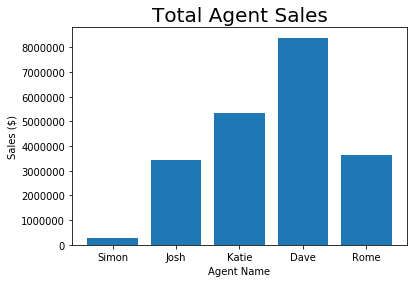

In [6]:
# Check if an agent has multiple sales 
dataset = {}
for i in range(len(agents)):
    if agents[i] not in dataset:
        dataset[agents[i]] = sales[i]
    else:
        dataset[agents[i]] += sales[i]
        
print(dataset)

plt.title("Total Agent Sales", fontsize = 20)
plt.xlabel("Agent Name")
plt.ylabel("Sales ($)")

plt.bar(dataset.keys(), dataset.values())
plt.show()

In [18]:
# query used to get house data
# select address, list_price, size from listing
house

# col = list(house.columns)
# # print(col)

# df1 = house[[col[1], col[2]]]
# # print(df1)

# list_price = house[col[1]].tolist()
# list_price = [x for x in list_price]
# size = house[col[2]].tolist()
# size = [x for x in size]

,address,list_price,size
0,404 Apprtment Building St. App. 201,210000,1200
1,303 Apprtment Building St. App. 1A,340000,1600
2,505 Apprtment Building St. App. 32,230000,1150
3,101 Apprtment Building St. App. 1101,90000,600
4,202 House Rd.,350000,2400
5,101 House Rd.,320000,2100
6,303 House Rd.,3500000,5300
7,404 House Rd.,1200000,3400
8,502 House Rd.,490000,3100
9,404 Apprtment Building St. App. 101,115000,800


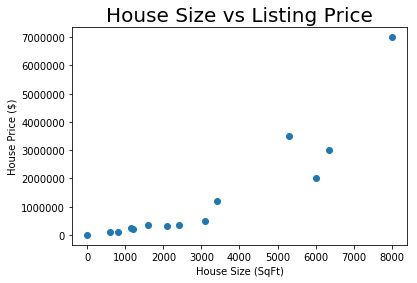

In [17]:
# Using matplotlib
plt.title("House Size vs Listing Price", fontsize = 20)
plt.xlabel("House Size (SqFt)")
plt.ylabel("House Price ($)")

plt.scatter(size, list_price)
plt.show()

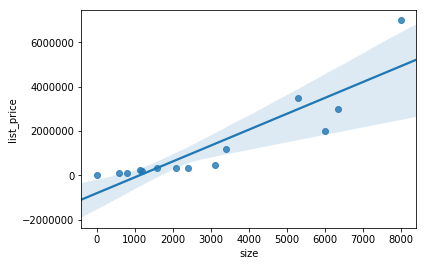

In [20]:
# Using seaborn - easy oneliner
import pandas as pd
import seaborn as sns

# ignore deprecation warning haha
import warnings
warnings.filterwarnings('ignore')

sns.regplot(house['size'], house['list_price'])